In [1]:
import copy
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns

import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt

from scipy.stats import linregress, pearsonr

from scipy.ndimage.filters import gaussian_filter

sns.set()
sns.set_style("white")

/var/folders/dn/kt6f6_td4dl2qrsg4wnv22z80000gn/T/ipykernel_29140/1960751332.py:14: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


/var/folders/dn/kt6f6_td4dl2qrsg4wnv22z80000gn/T/ipykernel_45371/253396937.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


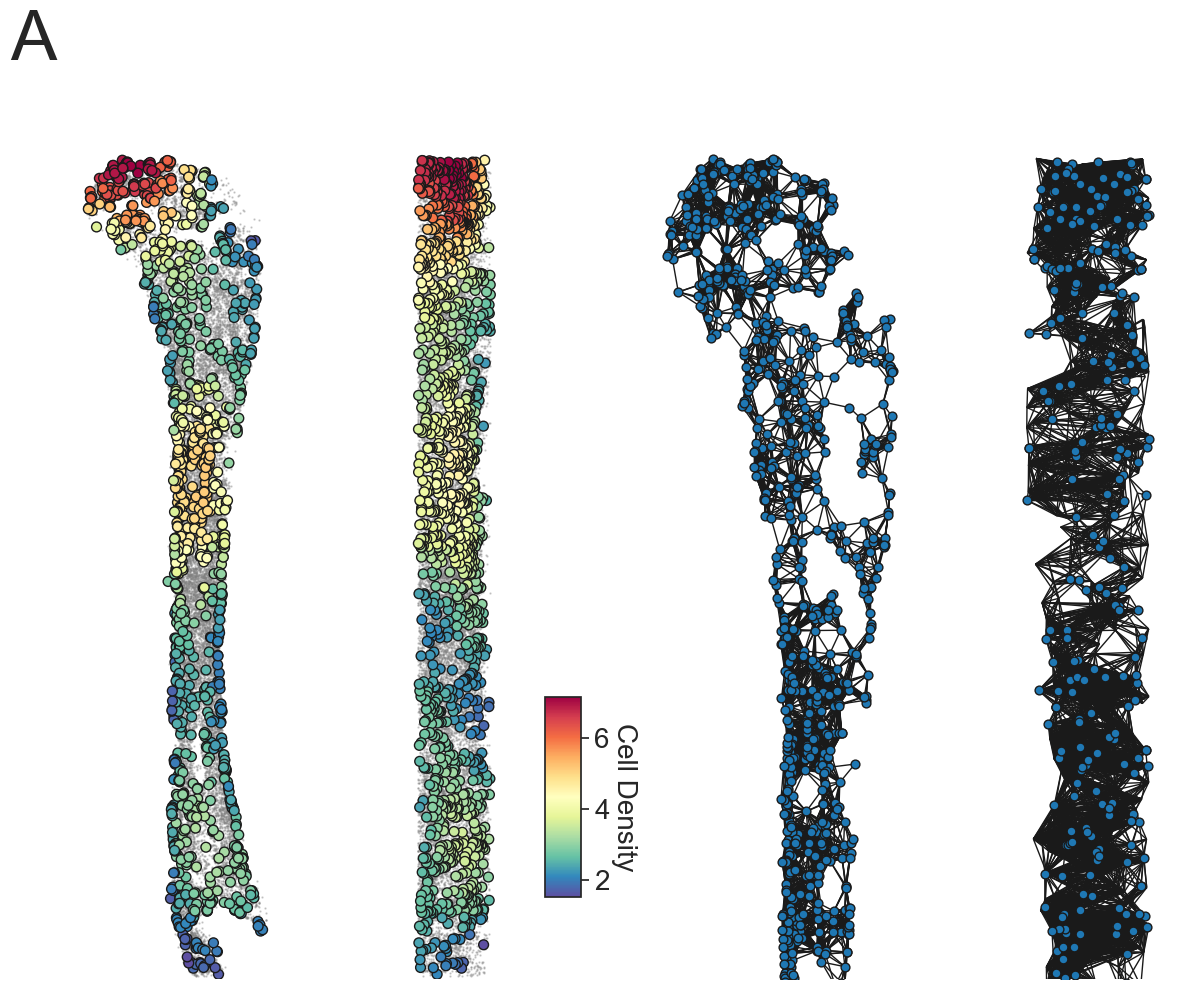

In [9]:
fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(141)
i = 4
sample = pd.read_csv('bone_data/normalized{:d}.csv'.format(i))

hsc = pd.read_csv('bone_data/hsc{:d}.csv'.format(i))

xy,x,y = np.histogram2d(hsc['PositionX'], hsc['PositionY'], bins = (10,40))
xy = gaussian_filter(xy, sigma =  2)

temp = np.array(hsc[['PositionX', 'PositionY']]).astype(int)
temp[:,0] = (temp[:,0] - x[0]) / (x[1] - x[0] + 0.01) 
temp[:,1] = (temp[:,1] - y[0]) / (y[1] - y[0] + 0.01)  
temp = temp.astype(int) 
z = xy[temp[:,0], temp[:,1]]

plt.scatter(-sample['PositionX'], sample['PositionY'], s = 0.5, alpha = 0.35, c = 'Grey')
plt.scatter(-hsc['PositionX'], hsc['PositionY'], s = 50, cmap='Spectral_r', c = z, linewidth = 1, edgecolors='k')

plt.xlabel('x-position', fontsize = 20)
plt.ylabel('y-position', fontsize = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlim(-3500, 500)
plt.ylim(0, 15000)

plt.axis('off')
plt.text(-0.2, 1.05, 'A', fontsize = 50, transform=ax.transAxes)

################################################################################ 
################################################################################

plt.subplot(142)

xy,x,y = np.histogram2d(hsc['PositionZ'], hsc['PositionY'], bins = (10,40))
xy = gaussian_filter(xy, sigma =  2)

temp = np.array(hsc[['PositionZ', 'PositionY']]).astype(int)
temp[:,0] = (temp[:,0] - x[0]) / (x[1] - x[0] + 0.01) 
temp[:,1] = (temp[:,1] - y[0]) / (y[1] - y[0] + 0.01)  
temp = temp.astype(int) 
z = xy[temp[:,0], temp[:,1]]

plt.scatter(-sample['PositionZ'], sample['PositionY'], s = 0.5, alpha = 0.35, c = 'Grey')
plt.scatter(-hsc['PositionZ'], hsc['PositionY'], s = 50, cmap='Spectral_r', c = z,
           linewidth = 1, edgecolors='k')

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('z-position', fontsize = 20)
plt.ylabel('y-position', fontsize = 20)

plt.xlim(-225, 200)
plt.ylim(0, 15000)

plt.axis('off')

cbaxes = fig.add_axes([0.45, 0.1, 0.03, 0.2]) 
cb = plt.colorbar(cax = cbaxes, shrink = 0.3, anchor = (0,0))
cb.set_label(label = 'Cell Density', size=20,  rotation= 270, labelpad=20)
cb.ax.tick_params(labelsize=20) 


################################################################################ 
################################################################################
plt.subplot(143)
i = 4
sample = pd.read_csv('bone_data/hsc{:d}.csv'.format(i))

sample = sample[['PositionX', 'PositionY', 'PositionZ']]
sample['PositionX'] = -sample['PositionX']

pos = {i: np.array(sample.loc[i]) for i in sample.index }
pos_xy = {i: np.array(sample.loc[i])[:2] for i in sample.index }
pos_zy = {i: np.array(sample.loc[i])[[2,1]] for i in sample.index }

G = nx.random_geometric_graph(n = len(pos), pos = pos, radius = 300, dim = 3)

nx.draw(G, pos = pos_xy, node_size= 10)
ax = nx.draw_networkx_nodes(G, pos = pos_xy, node_size=40, #node_color='r', 
                    linewidths= 1, edgecolors = 'k')
ax.set_edgecolor("k") 
plt.xlim(-3500, -500)
plt.ylim(7000, 14500)

################################################################################ 
################################################################################

plt.subplot(144)
idx = np.random.choice(sample.index, 500)
nx.draw(G, pos = pos_zy, nodelist = idx, node_size= 10)
nx.draw_networkx_nodes(G, pos = pos_zy, nodelist = idx, node_size=40, #node_color='r', 
                    linewidths= 1, edgecolors = 'k')#.set_edgecolor("k") 
plt.xlim(-100, 150)
plt.ylim(7000, 14500)

plt.tight_layout()

plt.savefig('Figure6_A.pdf', bbox_inches= "tight", pad_inches=0.1)
plt.show()

In [3]:
data_g = []
for i in range(200):
    g = np.loadtxt("Bone_graphs/%d.txt" % i)
    
    data_g += [g.max() + 1]

1.001


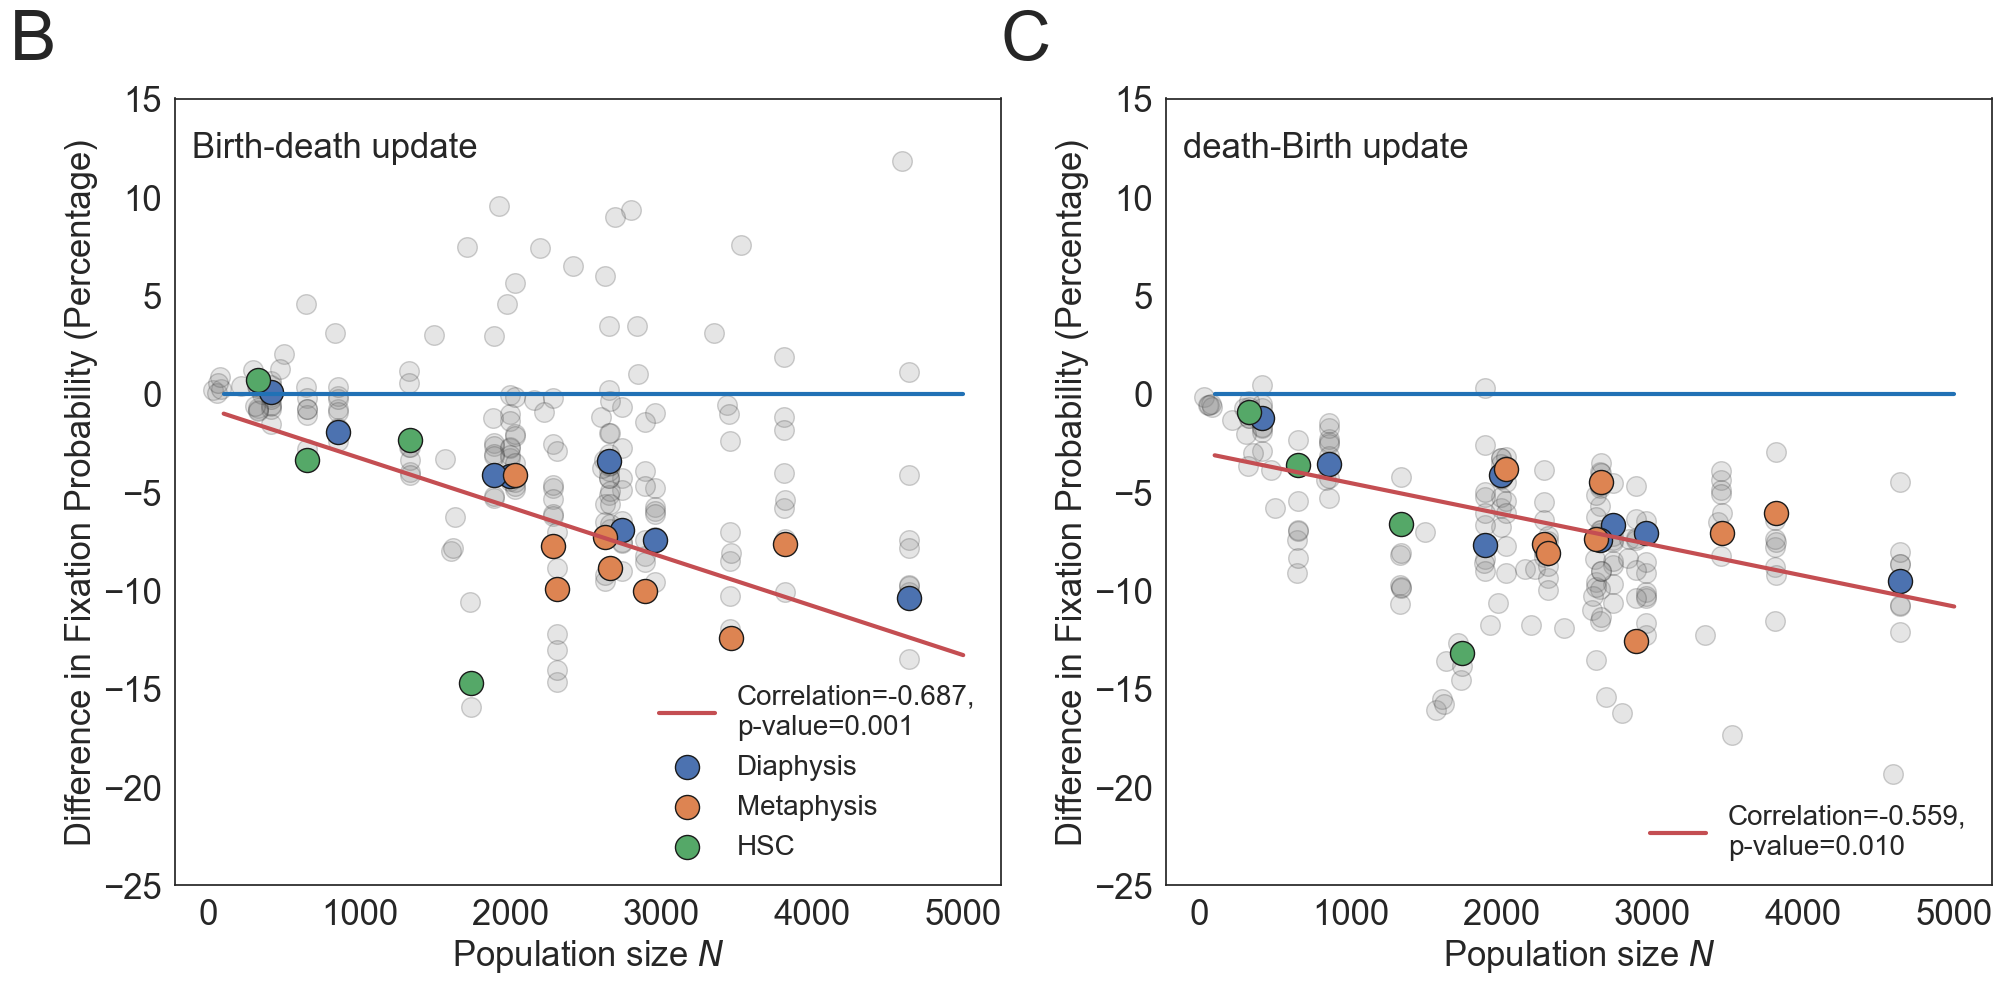

In [4]:
ls = os.listdir('combined_results')
data = np.nan * np.ones(200)
data_db = np.nan * np.ones(200)

for f in ls:
    idx, s = f[:-4].split("_")
    
    if s == "001":
        temp = np.loadtxt('combined_results/' + f)
        data[int(idx)] = temp[0,2] / (temp[0,1] + temp[0,2])
        
        data_db[int(idx)] = temp[1,2] / (temp[1,1] + temp[1,2])
        
r = 1 + temp[0,0]
print(r)
data_wm = (1 - 1 / r) / (1 - 1 / np.power(r, data_g))

########################################################################
fig = plt.figure(figsize = (20,10))

ax = fig.add_subplot(121)

x, y = data_g[8::10], 100 * ((data - data_wm) / data_wm)[8::10]

reg = linregress(x, y)
plt.plot([100,5000], reg.intercept + reg.slope * np.array([100,5000]), c = 'r', 
         linewidth = 3) 

plt.scatter(x[:8], y[:8], edgecolors='k', s = 300) 
plt.scatter(x[8:16], y[8:16], edgecolors='k', s = 300) 
plt.scatter(x[16:], y[16:], edgecolors='k', s = 300) 

plt.scatter(data_g, 100 * ((data - data_wm) / data_wm), c = 'grey', 
            alpha = 0.2, edgecolors='k', s = 200, zorder = -1)

plt.plot([100,5000], [0,0], c = '#2171b5', linewidth = 3)


plt.legend(['Correlation=%.3f,\np-value=%.3f'%(reg.rvalue, reg.pvalue), 'Diaphysis', 'Metaphysis', 'HSC'], 
           fontsize = 20, frameon=False, loc = 'lower right')

plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Population size $N$', fontsize = 25)
plt.ylabel('Difference in Fixation Probability (Percentage)', fontsize = 25)

plt.ylim(-25,15)
plt.text(0.02, .925, 'Birth-death update', fontsize = 25, transform=ax.transAxes)
plt.text(-0.2, 1.05, 'B', fontsize = 50, transform=ax.transAxes)


########################################################################
ax = fig.add_subplot(122)

x, y = data_g[8::10], 100 * ((data_db - data_wm) / data_wm)[8::10]
reg = linregress(x, y)

plt.plot([100,5000], reg.intercept + reg.slope * np.array([100,5000]), c = 'r', linewidth = 3)

plt.scatter(x[:8], y[:8], edgecolors='k', s = 300) 
plt.scatter(x[8:16], y[8:16], edgecolors='k', s = 300) 
plt.scatter(x[16:], y[16:], edgecolors='k', s = 300) 

plt.scatter(data_g, 100 * ((data_db - data_wm) / data_wm), c = 'grey', 
            alpha = 0.2, edgecolors='k', s = 200, zorder = -1) 


plt.plot([100,5000], [0,0], c = '#2171b5', linewidth = 3)

plt.legend(['Correlation=%.3f,\np-value=%.3f'%(reg.rvalue, reg.pvalue)], 
           fontsize = 20, frameon=False, loc = 'lower right')

plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Population size $N$', fontsize = 25)
plt.ylabel('Difference in Fixation Probability (Percentage)', fontsize = 25)

plt.ylim(-25,15)
plt.text(0.02, .925, 'death-Birth update', fontsize = 25, transform=ax.transAxes)
plt.text(-0.2, 1.05, 'C', fontsize = 50, transform=ax.transAxes)

plt.tight_layout()

plt.savefig('Figure6_BC.pdf', bbox_inches= "tight", pad_inches=0.1)
plt.show()